# Binary Classifiaction

## Downloading Our data images train and test images which is `pizza_steak`

In [ ]:
# Download zipfile
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-09-11 00:43:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   160MB/s    in 0.7s    

2023-09-11 00:43:38 (160 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Now let's unzip it and play with it
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspection to our data


In [ ]:
# show in directories our data
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak') :
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 2 directories and 0 in 'pizza_steak'
There are 2 directories and 0 in 'pizza_steak/train'
There are 0 directories and 750 in 'pizza_steak/train/pizza'
There are 0 directories and 750 in 'pizza_steak/train/steak'
There are 2 directories and 0 in 'pizza_steak/test'
There are 0 directories and 250 in 'pizza_steak/test/pizza'
There are 0 directories and 250 in 'pizza_steak/test/steak'


In [ ]:
# let's get class names with path
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import random
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# visualize our images
def show_random_img(target_dir, target_class):
  # setupt target folder
  target_folder = target_dir + target_class

  # get random img
  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # plot image
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)

  return img

['393349.jpg']


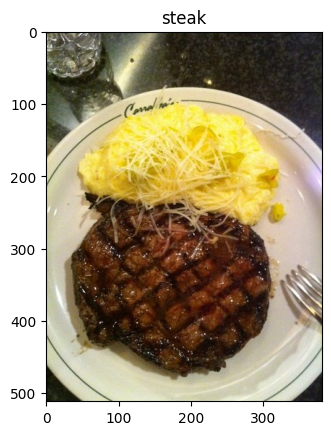

In [ ]:
# let's test our function
img = show_random_img(target_dir   = 'pizza_steak/train/',
                target_class = 'steak')

In [ ]:
# let's convert out imnage array to tensors
import tensorflow as tf
img = tf.constant(img)
img

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 86,  85,  55],
        [ 85,  84,  54],
        [ 76,  75,  44],
        ...,
        [ 35,  34,  39],
        [ 48,  47,  52],
        [ 52,  51,  56]],

       [[104, 103,  73],
        [ 92,  91,  61],
        [ 78,  77,  46],
        ...,
        [ 31,  30,  35],
        [ 41,  40,  45],
        [ 43,  42,  47]],

       [[111, 112,  81],
        [ 99, 100,  69],
        [ 84,  83,  52],
        ...,
        [ 31,  31,  33],
        [ 36,  35,  40],
        [ 36,  35,  40]],

       ...,

       [[ 27,  31,  14],
        [ 25,  29,  12],
        [ 21,  25,   8],
        ...,
        [ 28,  26,  31],
        [ 29,  24,  31],
        [ 28,  23,  30]],

       [[ 25,  29,  12],
        [ 24,  28,  11],
        [ 21,  25,   8],
        ...,
        [ 26,  24,  29],
        [ 27,  22,  28],
        [ 26,  21,  27]],

       [[ 16,  20,   3],
        [ 18,  22,   5],
        [ 20,  24,   7],
        ...,
        [ 25,  23,  2

## Break Down Our Data


### Visualize Our Data

In [ ]:
import matplotlib.pyplot as plt

['295491.jpg']
['3821701.jpg']


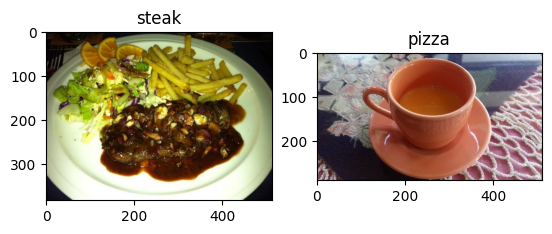

In [ ]:
# Let's show our data
plt.figure
plt.subplot(1,2,1)
steak_img = show_random_img(target_dir   = 'pizza_steak/train/', target_class = 'steak')
plt.subplot(1,2,2)
pizza_img = show_random_img(target_dir   = 'pizza_steak/train/', target_class = 'pizza')

### Process Our data


In [ ]:
# create train, test generators and rescale them
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Let's scale our images with make all pixeles between 0 : 1
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
# Define Our directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

len(train_data), len(test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(47, 47)

In [ ]:
# Let's show batch from loading data
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

### Create CNN model

#### Model_1 without MaxPool

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='same',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 0.6149 - accuracy: 0.7287 - val_loss: 0.3855 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3786 - accuracy: 0.8387 - val_loss: 0.3079 - val_accuracy: 0.8787
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.2852 - accuracy: 0.8867 - val_loss: 0.2020 - val_accuracy: 0.9280
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1859 - accuracy: 0.9373 - val_loss: 0.0906 - val_accuracy: 0.9853
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.0909 - accuracy: 0.9773 - val_loss: 0.1361 - val_accuracy: 0.9567


### Plotting Function For Loss Curves

In [37]:
# Let's make function that take hist then plot validation and training curves
import matplotlib.pyplot as plt

def plot_loss_curve(hist):
  # For losses
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  # For accuracy
  accuracy = hist.history['accuracy']
  val_accuracy = hist.history['val_accuracy']

  epochs = range(len(loss))

  # plot loss
  plt.figure()
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, val_loss, label='test_loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, val_accuracy, label='test_accuracy')
  plt.xlabel('epochs')
  plt.legend()



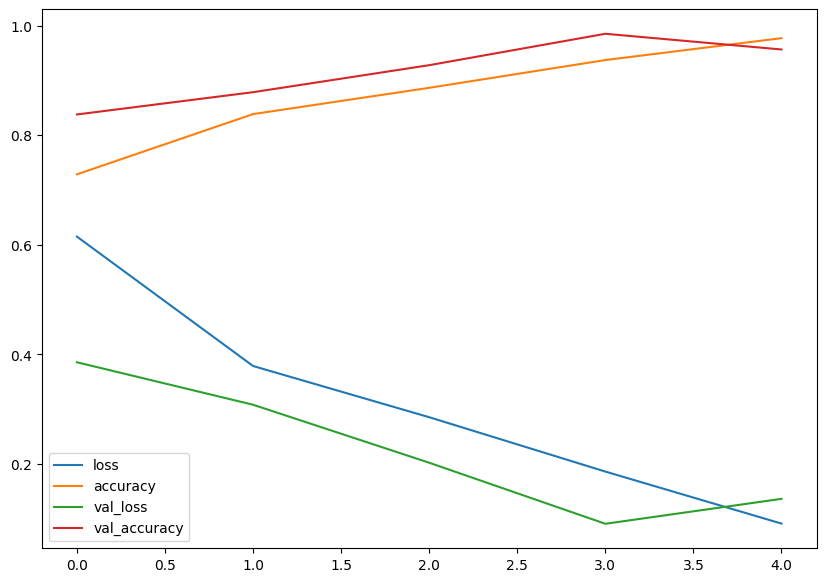

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

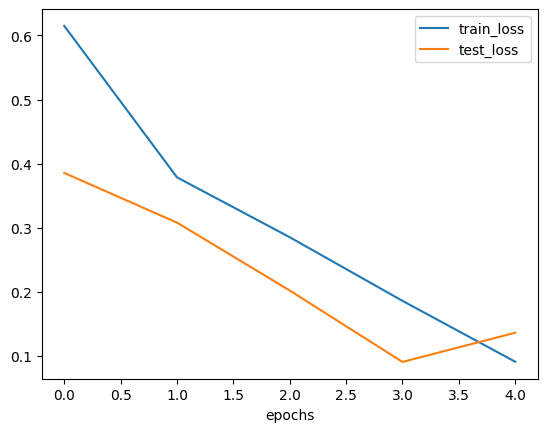

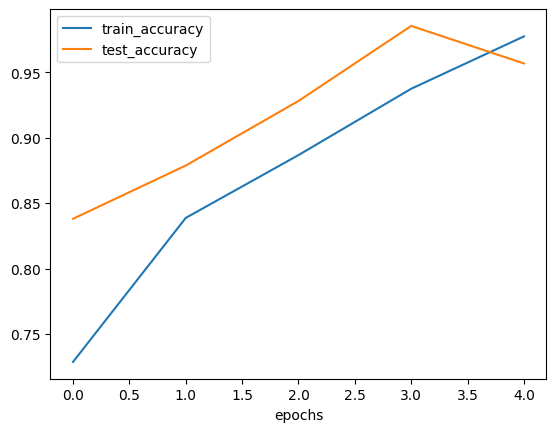

In [ ]:
# Let's check on our history of model
plot_loss_curve(history_1)

In [ ]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 conv2d_53 (Conv2D)          (None, 222, 222, 10)      910       
                                                                 
 conv2d_54 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 flatten_17 (Flatten)        (None, 484000)            0         
                                                                 
 dense_17 (Dense)            (None, 1)                 484001    
                                                                 
Total params: 486101 (1.85 MB)
Trainable params: 486101 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model_2 with MaxPool

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 200ms/step - loss: 0.6433 - accuracy: 0.6273 - val_loss: 0.6082 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5002 - accuracy: 0.7493 - val_loss: 0.4279 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4310 - accuracy: 0.8080 - val_loss: 0.4758 - val_accuracy: 0.7967
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4139 - accuracy: 0.8273 - val_loss: 0.3761 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3823 - accuracy: 0.8333 - val_loss: 0.3449 - val_accuracy: 0.8493


<Axes: >

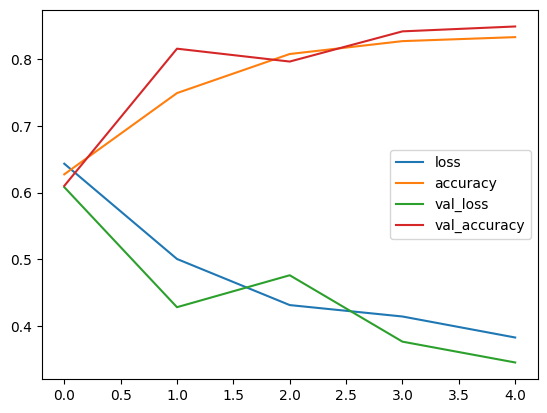

In [ ]:
# Show loss curves
import pandas as pd
pd.DataFrame(history_2.history).plot()

#### Get augmanted data and reduce Overfitting by it
**Note** Data Here Not shuffled

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's make aug_gen
train_datagen_aug = ImageDataGenerator(rescale = 1/255.0,
                                       rotation_range=0.2,
                                       shear_range= 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

# Let's make gen
train_datagen = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
# Define Our directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Let's load Data aug
train_data_aug =  train_datagen_aug.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size = 32,
                                                        shuffle = False,
                                                        class_mode = 'binary')

# Let's load Data
train_data =  train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size = 32,
                                                shuffle = False,
                                                class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
# Get sample of data
images, labels = train_data.next()
images_aug, labels_aug = train_data_aug.next()

Image Num : 29


Text(0.5, 1.0, 'Augmanted')

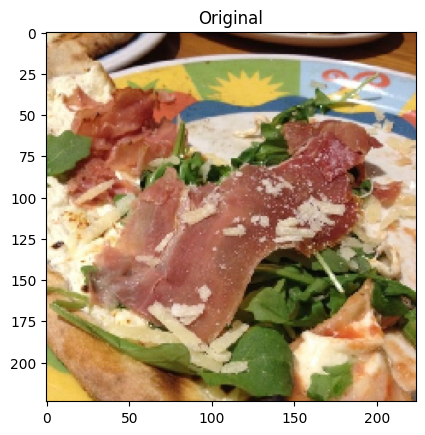

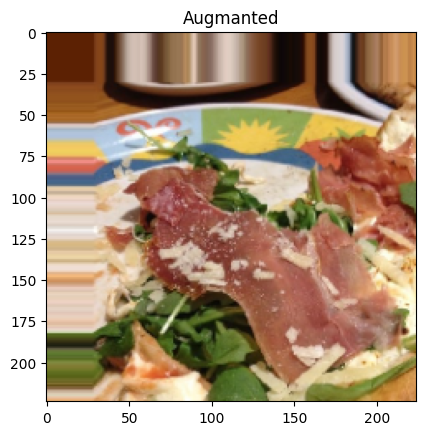

In [ ]:
# Let's plot our data
import random

# make number random
rand_num = random.randint(0, len(images))
print(f"Image Num : {rand_num}")

# Plot our data
plt.figure()
plt.imshow(images[rand_num])
plt.title('Original')

plt.figure()
plt.imshow(images_aug[rand_num])
plt.title('Augmanted')

##### Create Model From Augmanted data

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 502ms/step - loss: 0.7142 - accuracy: 0.4840 - val_loss: 0.6856 - val_accuracy: 0.5007
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6905 - accuracy: 0.5653 - val_loss: 0.6629 - val_accuracy: 0.7107
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6785 - accuracy: 0.6040 - val_loss: 0.6385 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 24s 523ms/step - loss: 0.6604 - accuracy: 0.6013 - val_loss: 0.5836 - val_accuracy: 0.7327
Epoch 5/5
47/47 [==============================] - 29s 617ms/step - loss: 0.5983 - accuracy: 0.6867 - val_loss: 0.6589 - val_accuracy: 0.6567


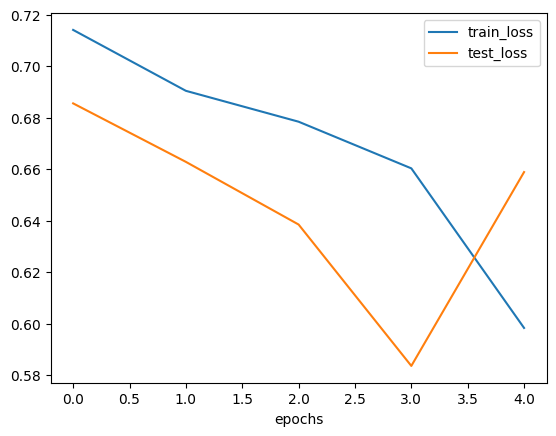

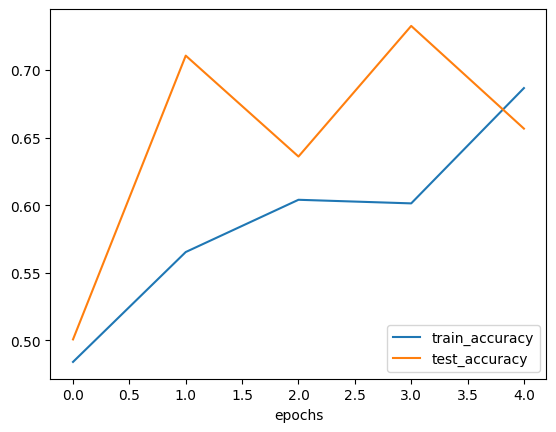

In [ ]:
# Let's show plot
plot_loss_curve(history_3)

#### Get augmanted data and reduce Overfitting by it
**Note** Data Here shuffled

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's make aug_gen
train_datagen_aug = ImageDataGenerator(rescale = 1/255.0,
                                       rotation_range=0.2,
                                       shear_range= 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

# Let's make gen
train_datagen = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
# Define Our directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Let's load Data aug
train_data_aug =  train_datagen_aug.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size = 32,
                                                        shuffle = True,
                                                        class_mode = 'binary')

# Let's load Data
train_data =  train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size = 32,
                                                shuffle = True,
                                                class_mode = 'binary')

test_data =  train_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size = 32,
                                                shuffle = True,
                                                class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##### Create Augmated Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 497ms/step - loss: 0.6562 - accuracy: 0.6347 - val_loss: 0.5271 - val_accuracy: 0.7573
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5407 - accuracy: 0.7473 - val_loss: 0.4411 - val_accuracy: 0.8047
Epoch 3/5
47/47 [==============================] - 23s 485ms/step - loss: 0.4934 - accuracy: 0.7693 - val_loss: 0.5103 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 32s 676ms/step - loss: 0.5025 - accuracy: 0.7660 - val_loss: 0.5036 - val_accuracy: 0.7773
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4733 - accuracy: 0.7860 - val_loss: 0.4524 - val_accuracy: 0.7700


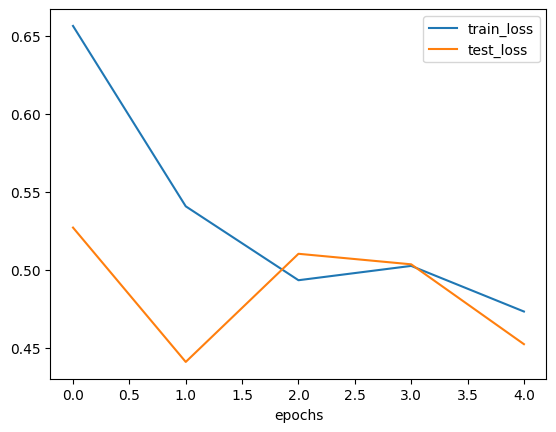

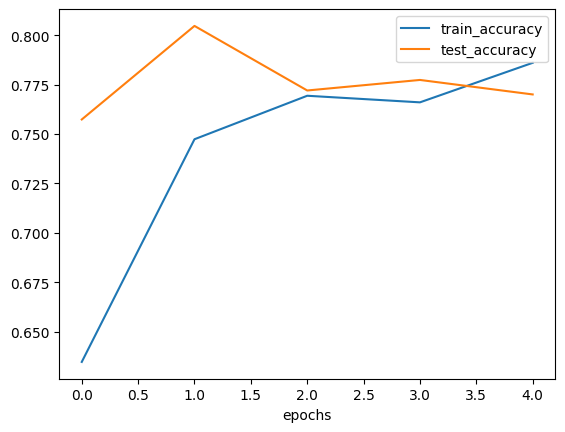

In [ ]:
# Let's show plot
plot_loss_curve(history_3)

##### Enhanced Model with Augmanted data (shuffled is `True`)
**Note:** Added some Filters and increase epochs

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_aug,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 33s 480ms/step - loss: 0.6295 - accuracy: 0.6293 - val_loss: 0.4673 - val_accuracy: 0.7760
Epoch 2/7
47/47 [==============================] - 21s 456ms/step - loss: 0.5524 - accuracy: 0.7220 - val_loss: 0.3767 - val_accuracy: 0.8280
Epoch 3/7
47/47 [==============================] - 25s 528ms/step - loss: 0.5313 - accuracy: 0.7367 - val_loss: 0.4345 - val_accuracy: 0.7980
Epoch 4/7
47/47 [==============================] - 26s 552ms/step - loss: 0.4995 - accuracy: 0.7673 - val_loss: 0.3683 - val_accuracy: 0.8260
Epoch 5/7
47/47 [==============================] - 24s 515ms/step - loss: 0.4751 - accuracy: 0.7820 - val_loss: 0.4021 - val_accuracy: 0.8180
Epoch 6/7
47/47 [==============================] - 22s 471ms/step - loss: 0.4843 - accuracy: 0.7640 - val_loss: 0.4158 - val_accuracy: 0.8300
Epoch 7/7
47/47 [==============================] - 28s 592ms/step - loss: 0.4418 - accuracy: 0.8047 - val_loss: 0.3299 - val_accuracy: 0.8520


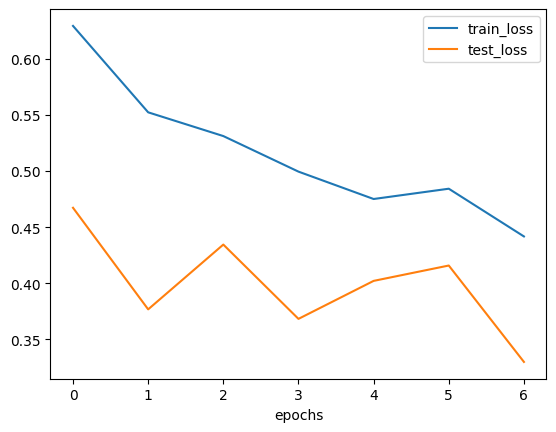

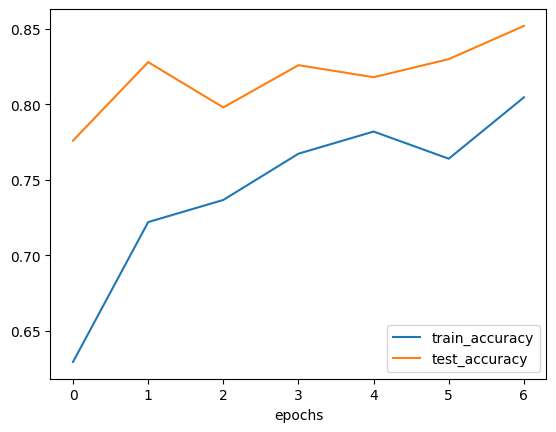

In [ ]:
# Ler's plot our loss curves
plot_loss_curve(history_5)


## Downloading Custom Img then predict on it


--2023-09-11 01:10:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-09-11 01:10:08 (47.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



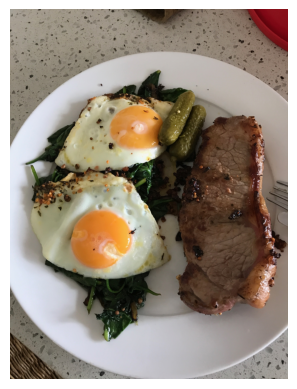

In [ ]:
import matplotlib.image as mpimg
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

### Let's make function that get probability of images


In [49]:
import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Let's check on function
img = load_preb_img("03-steak.jpeg")
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Predice
model_5.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 19ms/step


array([[0.85451734]], dtype=float32)

## Let's make function that take probablity then get class of image


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def pred_and_plot(model, filename, class_names = class_names):
  """
  Function that take img then make predictions on it,
  then get it's probabilty and out class of it
  """

  # Import images and make scaling on it
  img = load_and_prep_image(filename)

  # Make predictions
  pred_img = model.predict(tf.expand_dims(img, axis=0))

  # Get class of img
  pred_class = class_names[int(tf.round(pred_img))]

  # PLot img
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")


1/1 [==============================] - 0s 21ms/step


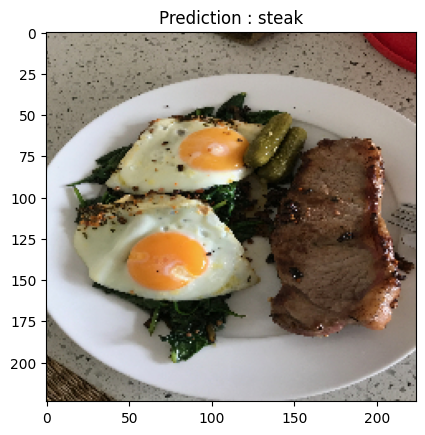

In [ ]:
# Let's on our images
pred_and_plot(model_5, "03-steak.jpeg")

1/1 [==============================] - 0s 155ms/step


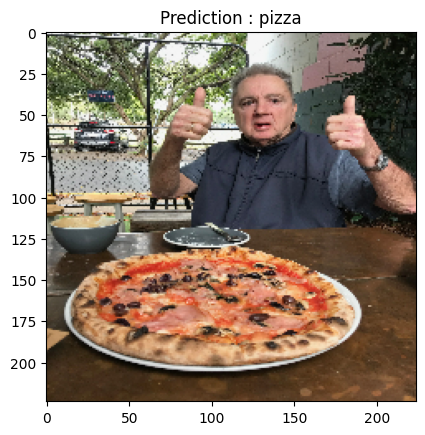

In [ ]:
# Let's on our images
pred_and_plot(model_5, "/content/03-pizza-dad.jpeg")

# Multi Class Classification

## Load Our Data

In [1]:
# import our data (10 classes of food)
import zipfile

# Download zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Reading and loading our zip file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2023-09-11 23:12:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.7MB/s    in 23s     

2023-09-11 23:12:39 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Inspect and Visualize Our dataset

In [3]:
# Walk throush all data
import os

for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 2 directories and 0 in '/content/10_food_classes_all_data'
There are 10 directories and 0 in '/content/10_food_classes_all_data/test'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/ramen'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/sushi'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/pizza'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 in '/content/10_food_classes_all_data/test/steak

In [11]:
# Let's make our train and test dir
train_dir = '/content/10_food_classes_all_data/train/'
test_dir  = '/content/10_food_classes_all_data/test/'

In [12]:
# Let's get class names
import pathlib
import os
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['138330.jpg']


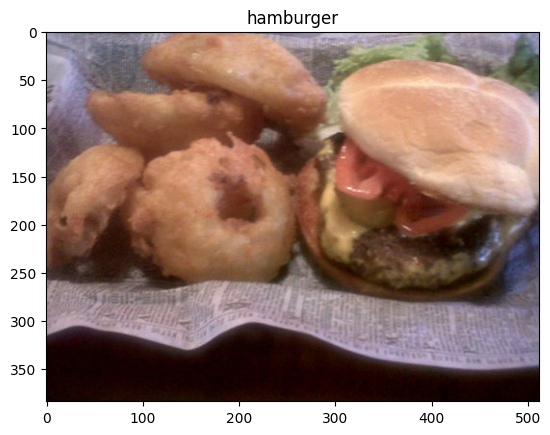

In [14]:
# Let's Visualize our data
import random

img = show_random_img(target_dir = train_dir,
                      target_class = random.choice(class_names))


## Preprocess Our data


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Our directories
train_dir = '/content/10_food_classes_all_data/train/'
test_dir  = '/content/10_food_classes_all_data/test/'

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Let's Build Our Model

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # Here is softamx Because we are MultiClass Classification
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])



In [35]:
# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 40s 155ms/step - loss: 2.2019 - accuracy: 0.1776 - val_loss: 2.1280 - val_accuracy: 0.2072
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 2.0388 - accuracy: 0.2719 - val_loss: 1.9711 - val_accuracy: 0.2928
Epoch 3/5
235/235 [==============================] - 34s 146ms/step - loss: 1.8937 - accuracy: 0.3436 - val_loss: 1.9321 - val_accuracy: 0.3228
Epoch 4/5
235/235 [==============================] - 29s 125ms/step - loss: 1.7330 - accuracy: 0.4089 - val_loss: 1.9071 - val_accuracy: 0.3560
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 1.5433 - accuracy: 0.4787 - val_loss: 1.9121 - val_accuracy: 0.3616


In [36]:
# Evaluationg Our model
model_6.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 1.9121 - accuracy: 0.3616


[1.9120937585830688, 0.36160001158714294]

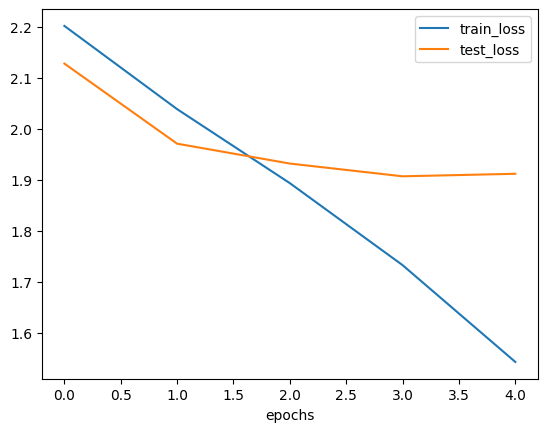

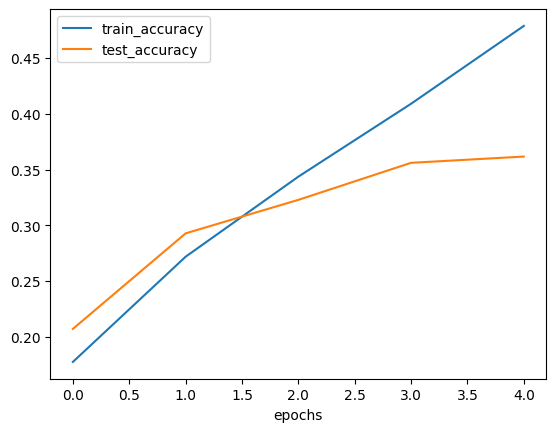

In [38]:
# Visualize our Curves
plot_loss_curve(history_6)

## Let's build model Simplifier for solving (loss is decreasing linear)

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # Here is softamx Because we are MultiClass Classification
])

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 118ms/step - loss: 2.1268 - accuracy: 0.2261 - val_loss: 1.9943 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.8681 - accuracy: 0.3497 - val_loss: 1.8862 - val_accuracy: 0.3392
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.6237 - accuracy: 0.4500 - val_loss: 1.8263 - val_accuracy: 0.3580
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 1.2861 - accuracy: 0.5687 - val_loss: 2.0216 - val_accuracy: 0.3524
Epoch 5/5
235/235 [==============================] - 27s 117ms/step - loss: 0.8734 - accuracy: 0.7161 - val_loss: 2.2597 - val_accuracy: 0.3464


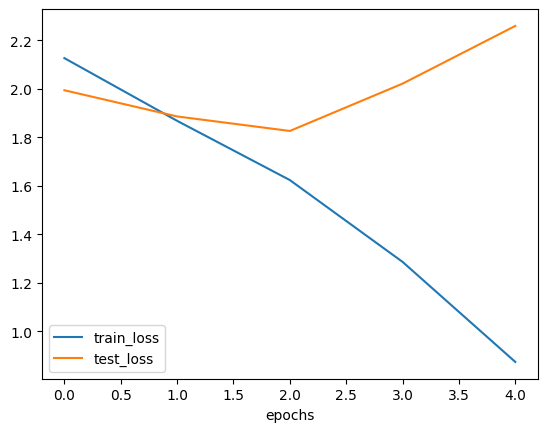

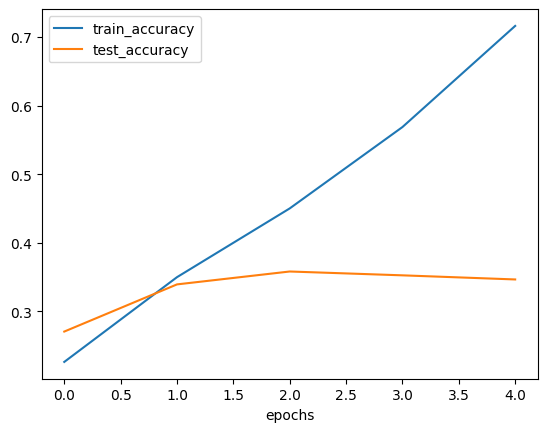

In [40]:
# Visualize our Curves
plot_loss_curve(history_7)

# From showin there are an OverFitting problem

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3), kernel_regularizer='l2'),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu', kernel_regularizer='l2'),
  MaxPool2D(pool_size=2, padding='same'),
  Conv2D(32, 3, activation='relu', kernel_regularizer='l2'),
  MaxPool2D(pool_size=2, padding='same'),
  Flatten(),
  Dense(10, activation='softmax') # Here is softamx Because we are MultiClass Classification
])

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 132ms/step - loss: 2.3469 - accuracy: 0.2091 - val_loss: 2.1369 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 36s 153ms/step - loss: 2.0693 - accuracy: 0.2912 - val_loss: 2.0274 - val_accuracy: 0.3088
Epoch 3/5
235/235 [==============================] - 30s 130ms/step - loss: 1.9460 - accuracy: 0.3409 - val_loss: 1.9879 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 36s 153ms/step - loss: 1.8049 - accuracy: 0.4068 - val_loss: 1.9508 - val_accuracy: 0.3444
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 1.6462 - accuracy: 0.4691 - val_loss: 1.9944 - val_accuracy: 0.3484


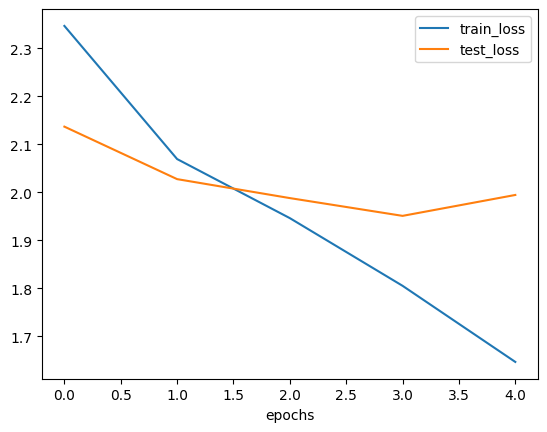

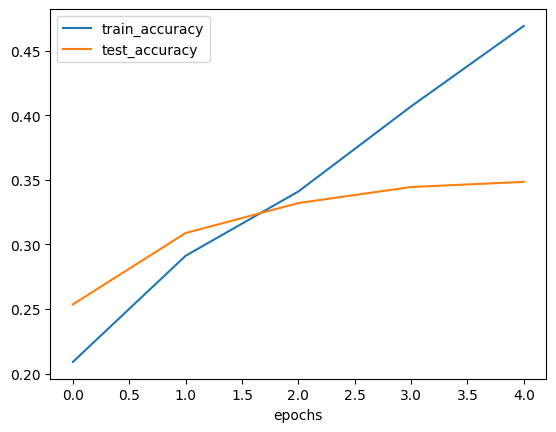

In [42]:
# Visualize our Curves
plot_loss_curve(history_7)

# Solve little Overfitting by regularization

## Try Using data augmentation to solve Overfitting data


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's make aug_gen
train_datagen_aug = ImageDataGenerator(rescale = 1/255.0,
                                       rotation_range=0.2,
                                       shear_range= 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

# Let's load Data aug
train_data_aug =  train_datagen_aug.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size = 32,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

# Let's load Data
train_data =  train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size = 32,
                                                shuffle = True,
                                                class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              shuffle = True,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Let's Build augmated model


In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2, padding='same'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2, padding='same'),
  Flatten(),
  Dense(10, activation='softmax') # Here is softamx Because we are MultiClass Classification
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 118s 492ms/step - loss: 2.1889 - accuracy: 0.1943 - val_loss: 1.9959 - val_accuracy: 0.2908
Epoch 2/5
235/235 [==============================] - 129s 547ms/step - loss: 2.0519 - accuracy: 0.2737 - val_loss: 1.9203 - val_accuracy: 0.2960
Epoch 3/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0081 - accuracy: 0.2980 - val_loss: 1.8643 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9721 - accuracy: 0.3161 - val_loss: 1.7982 - val_accuracy: 0.3808
Epoch 5/5
235/235 [==============================] - 107s 457ms/step - loss: 1.9342 - accuracy: 0.3303 - val_loss: 1.8073 - val_accuracy: 0.3844


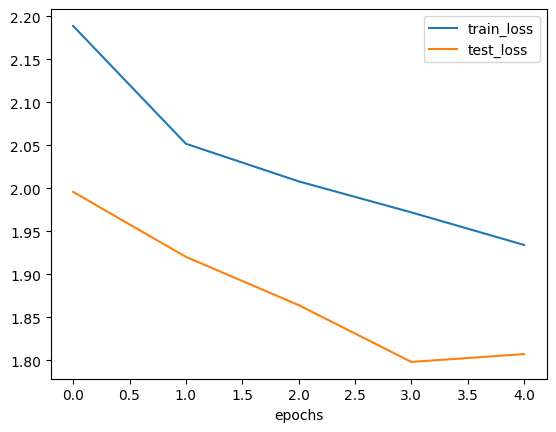

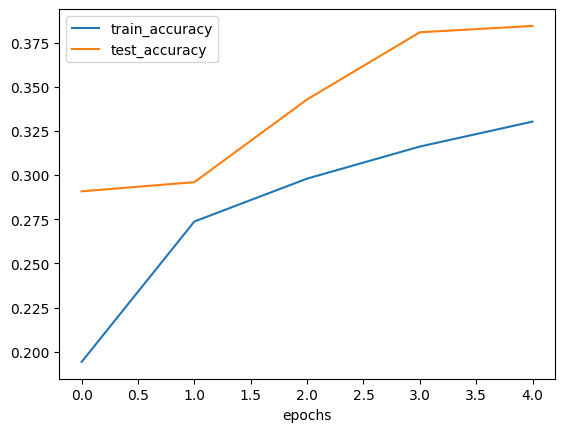

In [51]:
# Visualize our Curves
plot_loss_curve(history_8)

## Let's predict on Custom images


### Let's reconfig function of pred and plot

In [59]:
import matplotlib.pyplot as plt
import tensorflow as tf

def pred_and_plot(model, filename, class_names = class_names):
  """
  Function that take img then make predictions on it,
  then get it's probabilty and out class of it
  """

  # Import images and make scaling on it
  img = load_and_prep_image(filename)

  # Make predictions
  pred_img = model.predict(tf.expand_dims(img, axis=0))

  # Get class of img
  if len(pred_img[0] > 1) :
    # That is Multiclass Classifiacaiotn
    pred_class = class_names[tf.argmax(pred_img[0])]
  else :
    # That isBinary Classification
    pred_class = class_names[int(tf.round(pred_img[0]))]

  # PLot img
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")

### Download Cusstom images

In [53]:
import matplotlib.image as mpimg
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-09-12 00:37:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-09-12 00:37:32 (210 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]

--2023-09-12 00:37:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

In [55]:
len(class_names), class_names

(10,
 array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
        'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
       dtype='<U14'))

1/1 [==============================] - 0s 26ms/step


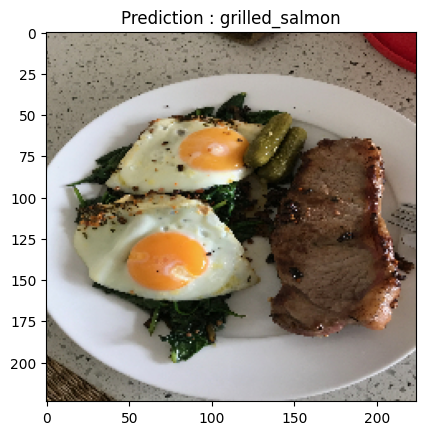

In [60]:
# Let's predict and plot
pred_and_plot(model_8, '03-steak.jpeg', class_names = class_names)